![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 17 - Non-parametric Clustering </center>
### <center> Hierarchical Clustering </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/17_NonparametricClustering/MainHierarchicalClustering.ipynb)

In [7]:
import numpy             as np
import matplotlib.pyplot as plt
import pandas            as pd
import seaborn           as sns
import matplotlib

matplotlib.rc('font', **{'size' : 16})

In [8]:
dData = pd.read_csv('ShoppingData.csv')
dData

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


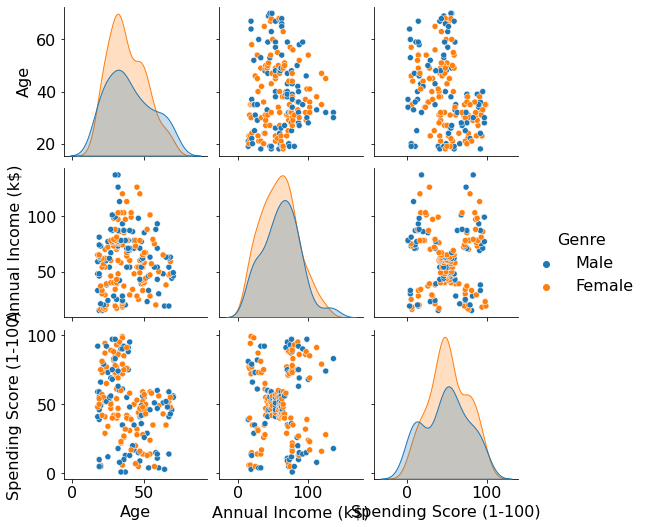

In [9]:
sns.pairplot(dData, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Genre')
plt.show()

In [10]:
dData.drop(columns=['CustomerID'], inplace=True)
dData = pd.get_dummies(dData, drop_first=True)
dData

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [12]:
from scipy.cluster import hierarchy

# mLinkage = hierarchy.linkage(dData, method='single')
# mLinkage = hierarchy.linkage(dData, method='complete')
mLinkage = hierarchy.linkage(dData, method='ward')
mLinkage.shape

(199, 4)

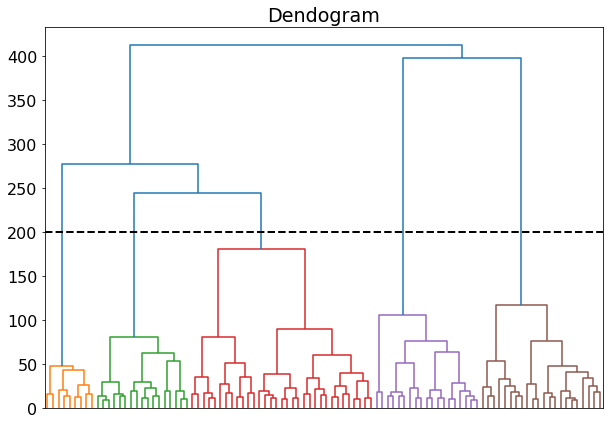

In [15]:
threshold = 200

plt.figure(figsize=(10, 7))
plt.title('Dendogram')
hierarchy.dendrogram(mLinkage, p=100, truncate_mode='lastp', color_threshold=threshold, no_labels=True)
plt.axhline(y=threshold, c='k', lw=2, linestyle='--')
plt.show()

In [16]:
vIdx = hierarchy.fcluster(mLinkage, threshold, criterion='distance')
vIdx

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 5, 4, 5, 4, 5, 4,
       3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4], dtype=int32)

In [17]:
dData2        = dData.copy()
dData2['Idx'] = vIdx

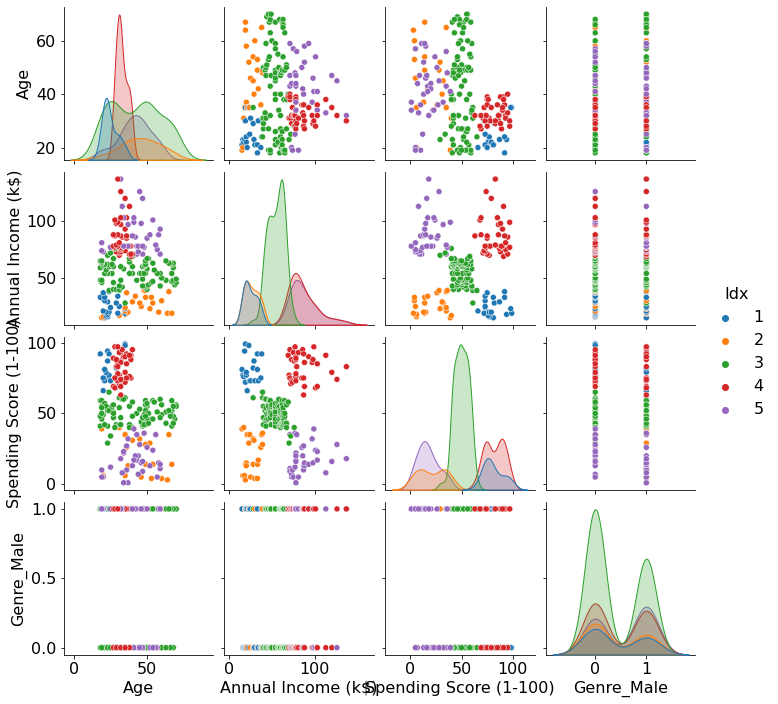

In [18]:
sns.pairplot(dData2, hue='Idx', palette=sns.color_palette()[:vIdx.max()])
plt.show()